## Entrenar la red neuronal VGG-16

### Importar los datos de train y test 

In [3]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Load Images
images = {
    "train":{},
    "test":{}  
}
for typ in ["train","test"]:
    #f"C:/Users/luism/Desktop/car_detectors_and_classifier/datasets/captures_vehicle_ classification/{typ}
    car_type = [p for p in os.listdir(f"datasets/captures_vehicle_ classification/{typ}")] 
    for vehicle in car_type:
        files = os.listdir(f"datasets/captures_vehicle_ classification/{typ}/{vehicle}")
        
        for file in files:
            path = f"datasets/captures_vehicle_ classification/{typ}/{vehicle}/{file}"
            img = cv2.imread(path)
            aux = img
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            images[typ][vehicle] = images[typ].get(vehicle,[]) + [img]

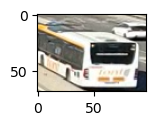

In [4]:
plt.figure(figsize=(2,1))
plt.imshow(images["train"]["bus"][0])

In [8]:
images["test"].keys()

dict_keys(['bus', 'car', 'truck'])

: 

In [6]:
X_train = []
Y_train = []
X_test = []
Y_test = []
for typ in images:
    for vehicle in images[f"{typ}"].keys():
        for img in images[f"{typ}"][f"{vehicle}"]:
            if typ == "train":
                X_train.append(img)
                Y_train.append(vehicle)
            else:
                X_test.append(img)
                Y_test.append(vehicle)


        

In [7]:
len(X_test)

58

bus


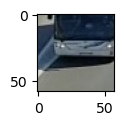

In [8]:
plt.figure(figsize=(2,1))
plt.imshow(X_test[3])
print(Y_test[3])

In [9]:
X_transformed_train = []
for img in X_train:
    im = Image.fromarray(img)
    im = im.resize((224,224))
    X_transformed_train.append(np.array(im)/255)

In [10]:
X_transformed_train = np.array(X_transformed_train)



Aplicamos "one hot encoding"

In [11]:
import pandas as pd
Y_train = pd.get_dummies(Y_train)
Y_train

,bus,car,truck
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
201,0,0,1
202,0,0,1
203,0,0,1
204,0,0,1


In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD


In [19]:
#definir el modelo VGG-16 preentrenado y elimina la capa superior:
model = keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


En este ejemplo, agregamos una capa Flatten para aplanar la salida de la última capa convolucional, seguida de dos capas densas con activación ReLU y Dropout. La última capa densa tiene una activación softmax para la clasificación de tres clases.

In [20]:
#A continuación, agrega tus propias capas personalizadas encima del modelo VGG-16 preentrenado:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications import VGG16
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import datetime 

# Checkpoint callback
checkpoint = ModelCheckpoint("fashion_model.h5", save_best_only=True)

# Early stop callback
early_stop = EarlyStopping(patience=10, restore_best_weights=True)


In [ ]:
# Define all callbacks in a list
callbacks =[
    checkpoint,
    early_stop,
    tensorboard_callback
]

In [ ]:

# Definimos los parametros de entrenamiento
params = {
    "validation_split": 0.2,
    "epochs": 10, 
    "callbacks": callbacks,
    "batch_size":32,
}

In [21]:
history = model.fit(X_transformed_train, Y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
6/6 [==============================] - 166s 26s/step - loss: 12.2751 - accuracy: 0.3476 - val_loss: 23.0903 - val_accuracy: 0.0000e+00
Epoch 2/10
6/6 [==============================] - 166s 27s/step - loss: 2.1703 - accuracy: 0.4268 - val_loss: 2.5113 - val_accuracy: 0.0000e+00
Epoch 3/10
6/6 [==============================] - 161s 26s/step - loss: 1.3894 - accuracy: 0.4512 - val_loss: 1.4313 - val_accuracy: 0.0000e+00
Epoch 4/10
6/6 [==============================] - 172s 28s/step - loss: 1.0452 - accuracy: 0.5305 - val_loss: 1.6344 - val_accuracy: 0.0000e+00
Epoch 5/10
6/6 [==============================] - 158s 26s/step - loss: 1.0263 - accuracy: 0.4695 - val_loss: 1.8913 - val_accuracy: 0.0000e+00
Epoch 6/10
6/6 [==============================] - 171s 28s/step - loss: 1.0045 - accuracy: 0.4634 - val_loss: 4.4804 - val_accuracy: 0.0000e+00
Epoch 7/10
6/6 [==============================] - 141s 23s/step - loss: 1.0412 - accuracy: 0.4817 - val_loss: 1.1938 - val_accuracy: 0

In [22]:
model.save("model_VGG16.h5")

In [23]:
from tensorflow.keras.models import load_model
from PIL import Image

stored_model_file = "model_VGG16.h5"
model_recover = load_model(stored_model_file)

In [33]:
import matplotlib.pyplot as plt


def plot_nn_loss(history):
    plt.figure(figsize=(5,2))
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")

    plt.legend()
def plot_nn_accuracy(history):
    plt.figure(figsize=(5,2))
    plt.plot(history.history["accuracy"], label="acc")
    plt.plot(history.history["val_accuracy"], label="val_acc")
    plt.legend()

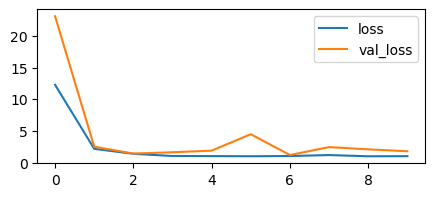

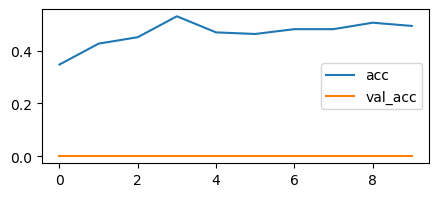

In [34]:
plot_nn_loss(history)
plot_nn_accuracy(history)